# MSDS 422 - Module 7 Assignment 1
## Yue Yu
github: https://github.com/yy383124955/msds422/tree/main/Week%207

## Data overview

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [2]:
# Import data
number_train = pd.read_csv('train.csv')
number_test = pd.read_csv('test.csv')

In [3]:
X_train = number_train.drop(labels = ["label"],axis = 1) 
y_train = number_train["label"]

## TLU

In [4]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron()
start=datetime.now()
per_clf.fit(X_train, y_train)
end=datetime.now()
y_pred_rf = per_clf.predict(number_test)
tlu_time = end-start

In [5]:
# Print time
print(tlu_time)

0:00:05.035837


In [6]:
y_pred_rf = pd.Series(y_pred_rf ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred_rf],axis = 1)
submission.to_csv("predictions-1.csv",index=False)

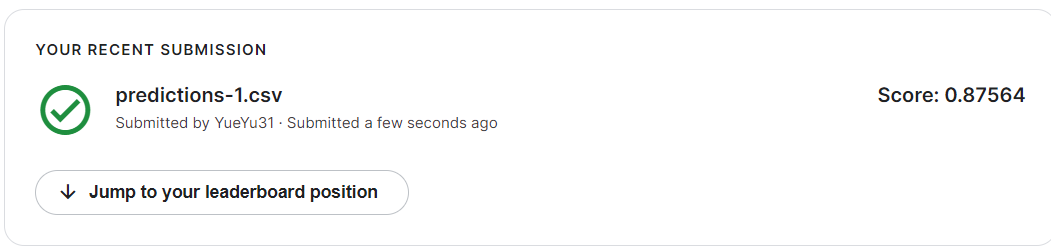

## MLP

In [52]:
from tensorflow import keras
from tensorflow.keras import layers

# Scale images to the [0, 1] range
X_train_2 = X_train / 255.0
number_test_2 = number_test / 255.0
# Make sure images have shape (784, 1, 1)
X_train_2 = np.expand_dims(X_train_2, -1)
number_test_2  = np.expand_dims(number_test_2 , -1)

In [53]:
X_train_2.shape

(42000, 784, 1)

In [54]:
num_classes = 10
input_shape = (784, 1)

In [55]:
y_train_2 = keras.utils.to_categorical(y_train, num_classes)
print("x_train shape:", X_train_2.shape)

x_train shape: (42000, 784, 1)


In [56]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]) 


In [57]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
start=datetime.now()
model.fit(X_train_2, y_train_2, batch_size=batch_size, epochs=epochs, validation_split=0.1)
end=datetime.now()
mlp_time = end-start

Epoch 1/5
296/296 [==============================] - 1s 2ms/step - loss: 0.3122 - accuracy: 0.9100 - val_loss: 0.1554 - val_accuracy: 0.9510
Epoch 2/5
296/296 [==============================] - 0s 2ms/step - loss: 0.1173 - accuracy: 0.9652 - val_loss: 0.1132 - val_accuracy: 0.9655
Epoch 3/5
296/296 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9779 - val_loss: 0.0954 - val_accuracy: 0.9705
Epoch 4/5
296/296 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9836 - val_loss: 0.0785 - val_accuracy: 0.9776
Epoch 5/5
296/296 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9883 - val_loss: 0.0922 - val_accuracy: 0.9717


In [58]:
# Print time
print(mlp_time)

0:00:02.740995


In [59]:
number_test_2.shape

(28000, 784, 1)

In [60]:
y_pred_2 =model.predict(number_test_2)

In [61]:
y_pred_2 = np.argmax(y_pred_2,axis = 1)

In [62]:
y_pred_2 = pd.Series(y_pred_2 ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred_2],axis = 1)
submission.to_csv("predictions-2.csv",index=False)

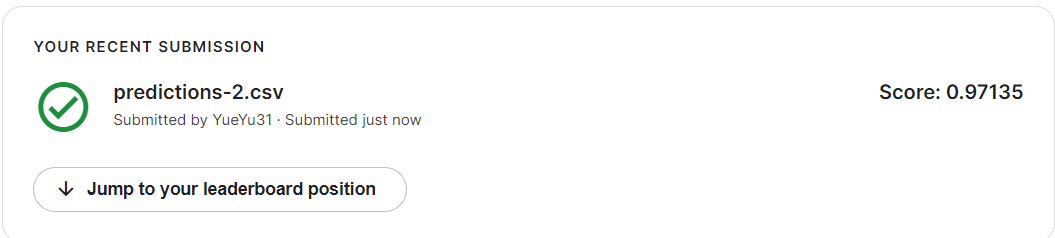

## MLP-2

In [63]:
# Scale images to the [0, 1] range
X_train_3 = X_train / 255.0
number_test_3 = number_test / 255.0
# Make sure images have shape (784, 1, 1)
X_train_3 = np.expand_dims(X_train_3, -1)
number_test_3  = np.expand_dims(number_test_3 , -1)

In [64]:
y_train_3 = keras.utils.to_categorical(y_train, num_classes)
print("x_train shape:", X_train_3.shape)

x_train shape: (42000, 784, 1)


In [65]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]) 

In [66]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
start=datetime.now()
model.fit(X_train_3, y_train_3, batch_size=batch_size, epochs=epochs, validation_split=0.1)
end=datetime.now()
mlp_time_2 = end-start

Epoch 1/5
296/296 [==============================] - 1s 1ms/step - loss: 0.3507 - accuracy: 0.9017 - val_loss: 0.1927 - val_accuracy: 0.9464
Epoch 2/5
296/296 [==============================] - 0s 1ms/step - loss: 0.1550 - accuracy: 0.9553 - val_loss: 0.1328 - val_accuracy: 0.9605
Epoch 3/5
296/296 [==============================] - 0s 1ms/step - loss: 0.1044 - accuracy: 0.9708 - val_loss: 0.1126 - val_accuracy: 0.9655
Epoch 4/5
296/296 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9784 - val_loss: 0.1016 - val_accuracy: 0.9690
Epoch 5/5
296/296 [==============================] - 0s 1ms/step - loss: 0.0586 - accuracy: 0.9829 - val_loss: 0.0882 - val_accuracy: 0.9748


In [67]:
# Print time
print(mlp_time_2)

0:00:02.128180


In [68]:
y_pred_3 =model.predict(number_test_3)

In [69]:
y_pred_3 = np.argmax(y_pred_3,axis = 1)

In [70]:
y_pred_3 = pd.Series(y_pred_3 ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred_3],axis = 1)
submission.to_csv("predictions-3.csv",index=False)

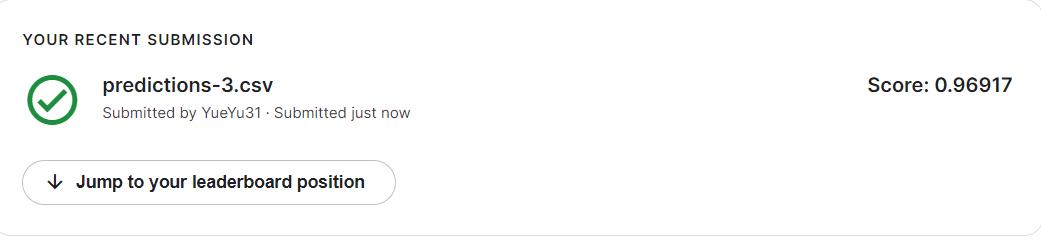

## MLP-3

In [71]:
# Scale images to the [0, 1] range
X_train_4 = X_train / 255.0
number_test_4 = number_test / 255.0
# Make sure images have shape (784, 1, 1)
X_train_4 = np.expand_dims(X_train_4, -1)
number_test_4  = np.expand_dims(number_test_4 , -1)

In [72]:
y_train_4 = keras.utils.to_categorical(y_train, num_classes)
print("x_train shape:", X_train_4.shape)

x_train shape: (42000, 784, 1)


In [73]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784, 1]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]) 

In [74]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
start=datetime.now()
model.fit(X_train_4, y_train_4, batch_size=batch_size, epochs=epochs, validation_split=0.1)
end=datetime.now()
mlp_time_3 = end-start

Epoch 1/5
296/296 [==============================] - 1s 1ms/step - loss: 0.4324 - accuracy: 0.8804 - val_loss: 0.2127 - val_accuracy: 0.9367
Epoch 2/5
296/296 [==============================] - 0s 998us/step - loss: 0.1677 - accuracy: 0.9504 - val_loss: 0.1484 - val_accuracy: 0.9548
Epoch 3/5
296/296 [==============================] - 0s 997us/step - loss: 0.1197 - accuracy: 0.9642 - val_loss: 0.1321 - val_accuracy: 0.9569
Epoch 4/5
296/296 [==============================] - 0s 997us/step - loss: 0.0922 - accuracy: 0.9724 - val_loss: 0.1144 - val_accuracy: 0.9643
Epoch 5/5
296/296 [==============================] - 0s 1ms/step - loss: 0.0728 - accuracy: 0.9777 - val_loss: 0.1042 - val_accuracy: 0.9650


In [75]:
# Print time
print(mlp_time_3)

0:00:01.782636


In [76]:
y_pred_4 =model.predict(number_test_4)
y_pred_4 = np.argmax(y_pred_4,axis = 1)
y_pred_4 = pd.Series(y_pred_4 ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred_4],axis = 1)
submission.to_csv("predictions-4.csv",index=False)

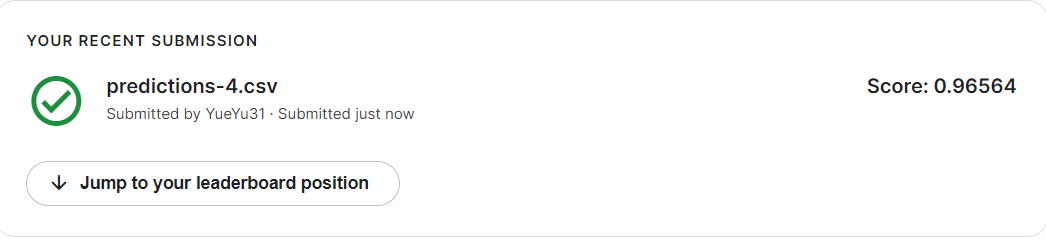

## MLP-4

In [77]:
# Scale images to the [0, 1] range
X_train_5 = X_train / 255.0
number_test_5 = number_test / 255.0
# Make sure images have shape (784, 1, 1)
X_train_5 = np.expand_dims(X_train_5, -1)
number_test_5  = np.expand_dims(number_test_5 , -1)

In [78]:
y_train_5 = keras.utils.to_categorical(y_train, num_classes)
print("x_train shape:", X_train_5.shape)

x_train shape: (42000, 784, 1)


In [79]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784, 1]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]) 

In [80]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
start=datetime.now()
model.fit(X_train_5, y_train_5, batch_size=batch_size, epochs=epochs, validation_split=0.1)
end=datetime.now()
mlp_time_4 = end-start

Epoch 1/5
296/296 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.8780 - val_loss: 0.2394 - val_accuracy: 0.9305
Epoch 2/5
296/296 [==============================] - 0s 889us/step - loss: 0.2059 - accuracy: 0.9415 - val_loss: 0.1801 - val_accuracy: 0.9512
Epoch 3/5
296/296 [==============================] - 0s 887us/step - loss: 0.1542 - accuracy: 0.9569 - val_loss: 0.1494 - val_accuracy: 0.9574
Epoch 4/5
296/296 [==============================] - 0s 905us/step - loss: 0.1229 - accuracy: 0.9656 - val_loss: 0.1336 - val_accuracy: 0.9590
Epoch 5/5
296/296 [==============================] - 0s 899us/step - loss: 0.1027 - accuracy: 0.9712 - val_loss: 0.1243 - val_accuracy: 0.9624


In [50]:
# Print time
print(mlp_time_4)

0:00:04.170779


In [51]:
y_pred_5 =model.predict(number_test_5)
y_pred_5 = np.argmax(y_pred_5,axis = 1)
y_pred_5 = pd.Series(y_pred_5 ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred_5],axis = 1)
submission.to_csv("predictions-5.csv",index=False)

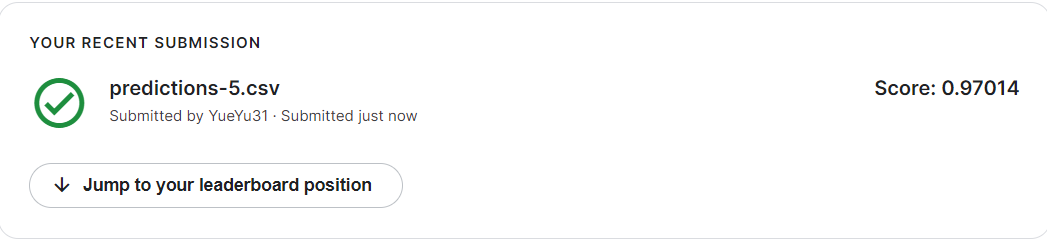

## Conclusion

In [85]:
data = [[4,300,mlp_time,0.9883,0.9713], [3,300,mlp_time_2,0.9829,0.9692], [4,100,mlp_time_3,0.9777,0.9656], [3,100,mlp_time_4,0.9712,0.9701]]

In [86]:
con_df = pd.DataFrame(data, columns = ['Layers', 'Nodes','Time','Training Accuracy','Testing Accuracy'])
con_df

,Layers,Nodes,Time,Training Accuracy,Testing Accuracy
0,4,300,0 days 00:00:02.740995,0.9883,0.9713
1,3,300,0 days 00:00:02.128180,0.9829,0.9692
2,4,100,0 days 00:00:01.782636,0.9777,0.9656
3,3,100,0 days 00:00:01.607934,0.9712,0.9701


In the beginning, I first used the TLU model, which is a single TLU network model in SKLearn, which can realize part of the perceptron learning algorithm. The accuracy rate in testing is also quite good (0.8756), and the speed is breakneck(0:00:04.825506). TLU is at a disadvantage in both speed and score in the MLP model with less hidden Layers.

But when I started testing the MLP model, the powerful neural network model quickly got scores that far exceeded TLU. I have listed your details in the table above. I adjusted the number of nodes in the hidden layer to test their impact on the predicted results. I also sampled the implications of hidden layers on the predicted results by reducing them. From the results, the more hidden layers, the more nodes, the higher the accuracy of prediction, and the more time consumed.